# Learning Git - Chapter 1
*Andreas Møgelmose, anmo@create.aau.dk, 2020*

This is a tutorial in the form of a Jupyter Notebook, which will help you learn the basics of Git. A Notebook is an interactive document. You can read is statically, but if you display it properly using Jupyter, you can actually run the embedded code directly on your computer. We'll get back to how exactly you do that.

The purpose of this document is not to teach you every detail about Git. I'll tell you some general information first. Then I will describe how my Git workflow is 95% of the time. And towards the end we'll go into some slightly more advanced stuff. I also have some opinions. If you disagree with them - say prefer another tool for something or other - that's totally fine. What I show here is what works for me.

For easier reading, I'm sometimes skipping some details. You'll be fine.

If you want to learn Git for real, I strongly recommend the book *Pro Git* by Chacon and Straub, which is available online for free right here: https://git-scm.com/book/en/v2

Git works best through the command line (or terminal, or shell, I use these words interchangeably). It is the official Git interface. Hence, this tutorial contains a lot of shell commands. The command line is the black window with gray text which looks very nerdy. For this tutorial, I assume you know enough about the command line to open it, navigate to a specific folder, and run a command. If you don't, go find a short tutorial for that. I also assume that you know what a text editor is (hint: Microsoft Word is not a text editor). I really like Sublime Text 3 if you need one.

## Contents of this tutorial

This tutorial is split into 3 chapters with one notebook file per chapter. Here's the lowdown:

0. Setting up Jupyter (this chapter, optional)
1. **Git basics** (this chapter)
2. [Git with a server (and friends!)](./LearningGit-Chapter2.ipynb)
3. [Advanced Git'ing - branching and pointers to more advanced topics](./LearningGit-Chapter3.ipynb)

You can always [find the latest version on Bitbucket](https://bitbucket.org/andreasmoegelmose/learninggit/src/master/). 

Here's a shortcut: [www.kortlink.dk/28x6g](https://www.kortlink.dk/28x6g)

## Who am I, and why should you listen to me?

I am an assistant professor at Aalborg University, and I have a background in computer engineering. I have used Git for several years. I have not, however, only used Git academically. Prior to my current position, I worked in the industry as a software engineer and project manager, so I have tried getting my hands dirty with Git in the real world. I am certainly no Git guru, but I know enough to be dangerous.

And enough to know what to Google when things go wrong.

My hope is that through this tutorial, I will take you on a journey like this:

![developers_projects](https://devhumor.com/content/uploads/images/March2019/developers_projects.jpg)

---

## Setting up Jupyter

To run a notebook, you need a few prerequisites. Note that nothing in this section has to do with Git. Neither Anaconda nor Jupyter are required to use Git. They are merely tools to help you follow the material in this notebook. If you would rather just manually run the commands in this notebook in your shell of choice, that is perfectly fine. Then just skip to the next section.

### Installing Anaconda
The easiest way to get Jupyter running is to install Anaconda. Anaconda is a distribution of the Python programming language, which greatly eases package management. Don't worry, we won't really be using Python in the tutorial, and if you don't know what package management is either, thats fine. Just know that Anaconda is the easiest way to get Jupyter running. 
Here's how to get going:

1. Download and install Anaconda for your platform from here: https://www.anaconda.com/distribution/
2. That's it! Open a terminal and type the command `conda`to check that it is installed and working.

### Installing the PowerShell kernel for Jupyter
For this notebook to work (even on Linux and Mac), you need the Jupyter PowerShell kernel. This is easy to install. Open a terminal and run the following two commands:

1. `pip install powershell_kernel`
1. `python -m powershell_kernel.install`

If you're on Linux or Mac and wondering why you need PowerShell, it's only because the Jupyter kernel works on all platforms. I only use PowerShell-specific commands for a little housekeeping in this notebook. You don't need PowerShell to use Git (after all, it was created by Linus Thorvalds), and all the Git commands work just fine in Bash.

### Downloading the notebooks
To run the notebooks, they have to be on your computer. Download everything in the `notebooks`-folder from [my Bitbucket repository](https://bitbucket.org/andreasmoegelmose/learninggit/src). The easiest way to do that is to just download the current notebooks.zip-file (click the file and click *View Raw*) and extract that. Be sure to keep the three .ipynb-files *and* the resources folder in the same folder.


### Running Jupyter
Running Jupyter is simple:
1. Open a terminal and navigate to the folder you downloaded to notebooks to.
1. Run `jupyter notebook` and a browser window should open, where you can click *Learning Git* to open this notebook.

### Running code in a notebook
To then run the code in this notebook, highlight a cell with code in it and press Shift+Enter (or click the Run-button in the toolbar. I recommend running the code in the order it is shown. Otherwise many commands will not work, as they depend on previous commands having run already.

---

# Git basics
## Getting started

First, a little housekeeping in case this notebook has been run before:

In [ ]:
$pwd = pwd; While ($pwd.ToString().Trim() -match 'aNewProject$') {cd ..; $pwd = pwd}
rmdir -Confirm:$false -Recurse -Force .\aNewProject\ *>$null
git config --global --unset user.email
git config --global --unset user.name

All right, ready to go. We need a project to work on! 

There's absolutely no black magic here, let's simply create a folder for it (you can of course also just create it using the GUI tools on your platform):

In [ ]:
mkdir aNewProject

We can now go to the folder and see that it is empty:

In [ ]:
cd aNewProject
ls -Force

See, no output from `ls`. Nothing to see here.

Let's create a file - to make it easy, we'll just copy one from the resources folder I made for this tutorial:

In [ ]:
cp ..\resources\hello1.py hello.py

Let's see what's inside:

In [ ]:
cat hello.py

Ah, just a simple Python script which prints *Hello World!* Now we have all we need to get started. Note that this far we have not done anything with Git at all. We have simply created a project folder and started writing code.

You can of course also open the folder in your GUI tool of choice and open hello.py in a text editor from there.

## Getting started (for real this time) - what is Git?

Git is a so-called *version control system* (VCS) - and actually it is a *distributed* version control system (DVCS).

We'll get back to the distributed part in a little bit. You might also have heard of other VCSs like SVN, CVS, Mercurial or Perforce. But what is a version control system?

A version control system is simply a piece of software which keeps track of changes to files as you make them. That's it.

It's such a simple idea. But this idea gives you some powerful tools.

### Advantages of version control
- You can always go back to an earlier revision if you make a mistake.
- It helps you work together with collaborators. With a VCS, you can always figure out who made some change that you don't understand.
- It allows you to figure out how to merge changes, in case you and a collaborator have made changes in the same piece of text at the same time.
- If a bug has been introduced *at some unknown point*, Git has powerful tooling to help you find the exact point where things went awry.

Of course, one should never use a tool without knowing when not to use it. Version control does not have many disadvantages, but there are some.

### Disadvantages of version control
- It works best with text-based projects. 

> The internal model of "a change" is centered around text, so Git is not great if your project mainly consists of architectural drawings or sound files or similar things (there are workarounds, though).

- It takes a little setup and is not fully automatic like Dropbox or similar tools.

> *You* have to tell Git when to save your changes. On the flip side, it is much, much better at handling change history than Dropbox.

- It can be a little bit intimidating at first.

![XKCD 1597](https://imgs.xkcd.com/comics/git.png)
(from the excellent webcomic XKCD, https://xkcd.com/1597/)

### Why Git?

Well, as mentioned there are other systems out there. Git is good because:

- It is lightweight - you can easily use it even for personal projects
- It is powerful - it can power huge projects, such as the entire Linux kernel
- It is *very* popular - chances are you'll have to use it when you join the real world

If you prefer Mercurial or Darcs or whatever, that's totally fine too. Then you should just find another tutorial. And convince your collaborators that your system is better.

### What is Git not?
Git is a piece of software which helps you manage changes to (mainly) text files.

Git does not provide you with a place online to store those files.

Git works just fine on your computer alone. But to really get the most of it when collaborating with others, it helps to have a central *repository*. That is an online place to store the files you control with Git, sort of like Dropbox.

While Git itself does not provide a central storage location, plenty of other services do so for free. For example:

* [Github](https://github.com/)
* [Gitlab](https://about.gitlab.com/)
* [Bitbucket](https://bitbucket.org/product/)

All of these provide some version of their product for free for students. We'll get back to them later.

### Is Git only for total nerds who love the terminal?
The official Git client is the terminal.

If you want to do advanced stuff, the terminal is your only option. If you want to do basic stuff, it still may be your best option.

There are, however, other tools available for those with a more visually inclined mind. Many third party graphical clients exist. Many editors (such as Visual Studio, Sublime Text, or Emacs) also have integrated Git support.

I have tried many graphical Git clients. The only one I can really recommend is [Sublime Merge](https://www.sublimemerge.com/). 

But that is not a problem, because Sublime Merge is *great*!

I generally prefer skipping editor integrations of Git and recommend using the command line, or Sublime Merge, or a combination of the two.

In this notebook I will mainly show how to use the command line, but also use a couple of screenshots from Sublime Merge.

### Installing Git
Just download and install from here: https://git-scm.com/downloads. You should be fine going with standard settings all the way through. On some systems, you may have to reboot after installing.

## Enough talk! Let's get to it!

Yes, all right, all right.

Let's make our project folder into a local git repository. First, we verify that our terminal is still pointed at our project folder:

In [ ]:
pwd

Great. Let's make it a git repository:

In [ ]:
git init

What just happened? A hidden folder named .git was created in our project folder (we use -Force to show hidden items):

In [ ]:
ls -Force

Looks good. Our hello.py file is there - as expected - and there is also a hidden folder named .git. This is simply Git's working folder. We should never touch it. Everything which needs to happen inside that folder happens using git commands on the command line or through Sublime Merge.

Now that we have turned our folder into a git repo (short for repository), we can ask git what it sees in our folder:

In [ ]:
git status

All right. Git tells us that we're on the *master branch*. We'll get back to that. More importantly, it tells us that we have *no commits*, meaning that we have not yet asked git to log the changes in any files. It also says "hey, I can see you have a file here, which I am not tracking?!? Dude, I should totally track changes in that file for you!" Conveniently, it also tells us that we can use `git add` to start tracking our file.

Okay, yeah, git is probably right that we should start tracking our file. If we don't, we're not really using Git after all.

In [ ]:
git add hello.py
git status

Now we have lined our file up to be tracked, and added its contents as new changes. This is called *staging* a file.

Next step is to actually *commit* the file and it's changes to git.

Staging is lining up a number of changes so they are ready to be captured by git. Just like lining up a family photo at a wedding: You choose who you want in this particular picture and line them up in front of the camera. Committing is similar to taking the picture.

In [ ]:
git commit -m "Add hello world feature."

Oops! Git does not know who we are, and it will not allow us to commit anything before we put our name on it - how else would people be able to blame me for any mistakes?? 

Fortunately, it's a quick fix. We follow the instructions and commit again. If you're following along at home, make sure you set your own name instead of mine.

Note that you can set any values here. *Bill Gates* and bill.g@microsoft.com would work just fine. This name and e-mail also have nothing to do with your login on Github or anywhere else.

We only need to set up our name once on this computer, Git will remember the setting.

In [ ]:
git config --global user.email "anmo@create.aau.dk"
git config --global user.name "Andreas Møgelmose"

And now we can commit the change:

In [ ]:
git commit -m "Add hello world feature."

Good. The commit succeded.

But what was the `-m` part about? `-m` means "message." 

It is very important that each commit we make has a good *commit message.* 

One could probably write long articles about what a good commit message is (in fact, there is one right [here](https://chris.beams.io/posts/git-commit/), and another one [here](https://juffalow.com/other/write-good-git-commit-message), and an entertaining [video](https://www.youtube.com/watch?v=8YjSty6bfog) to boot). 

Basically, your commit message should explain what your change does (and often it is also good to explain why). It is basically the title of your changes.

Remember, in the future, people may be trying to understand your project by reading through your commit messages.

![Git Commit (XKCD)](https://imgs.xkcd.com/comics/git_commit.png)
(from https://xkcd.com/1296/)

Let us verify that Git agrees with us that our change has been committed:

In [ ]:
git status

Yes. There is nothing to commit, meaning that we have no new changes which have not been captured by git. 

It is important to understand that git has not made any changes at all to our actual file. It looks exactly the same:

In [ ]:
cat hello.py

Uh oh! There is a bug!

A spelling error in World. Let's fix it. 

For this demonstration, we'll simply pull in a fixed version from our resources-folder. Cheating a little bit, just like in the TV-kitchen.

In [ ]:
cp ..\resources\hello2.py hello.py
cat hello.py

Much better. What does Git say?

In [ ]:
git status

Ahh, there is a change which has not been staged for commit. 

If we were curious, we could ask Git what the change actually is:

In [ ]:
git diff

Ok, so this is a little tricky to read, and we'll get back to easier ways of showing this (hint hint, this is where Sublime Merge really shines), but what this means is that the change has happened to the file hello.py on line 1, where `print("Hello Wordl");` has been removed and `print("Hello World");` has been added.

Of course, we knew this already so calling `git diff` was completely unnecessary. Let's just stage and commit the change:

In [ ]:
git add .
git commit -m "Fix spelling error."

This time I used a little shortcut. I knew that for this particular commit, I wanted all changes present staged, so I simply typed `git add .`. This is shorthand for "stage all changes in the current directory." And then I committed with a good message as usual.

Let's have a look at why you should not just use `git add .` all the time.

### Staging changes in atomic commits

All right, thing are going great in our project. We're close to having implemented the next Facebook.

Let's make a couple of changes.

We better add a licence file so people know if they can copy our code. And because we're closing in on Facebook, we better also add another message in the software:

In [ ]:
cp ..\resources\LICENSE.txt
cp ..\resources\hello3.py hello.py
cat hello.py

Much better.

What does git say about our changes?

In [ ]:
git status

Oooh, now we have two changes. One untracked (meaning new) file, and one changed file. We could of course add these files to the same commit with `git add .`, but that's not really a great idea. After all, the license change and the new print-statement are completely unrelated to each other. They are different features in our project. So putting them in the same commit would be confusing for people who were reading our project history. And those people will be future-us when we are hunting for some bug later on.

Let's make it easier for future-us by making *atomic commits*.

An atomic commit is simply a neat little commit which is concerned with only one thing - solving one bug, adding one feature. As a bonus, atomic commits are really easy to write commit messages for.

In [ ]:
git add LICENSE.txt
git commit -m "Put the project under the MIT license."
git add hello.py
git commit -m "Add a welcome message for Mark Zuckerberg."

It is important that I run the first commit command right after the first add. If I had done both adds first, both changesets would be in the staging area (both would be in front of the camera, to stay with the photography metaphor) and both would be committed as part of a single, messy commit.

Some changes might touch upon multiple files, even for an atomic commit. That's fine, you can easily `git add multiple.py files.txt` to the same commit.

In fact, git is flexible enough to allow for committing only *parts of files*. This is pretty cool.

So if I fix two different bugs in the same file, I can make two commits out of that. You can do it through the command line (see [chapter 7.2](https://git-scm.com/book/en/v2/Git-Tools-Interactive-Staging)), but this is much easier to do in Sublime Merge, where you simply click the hunks and lines you want to stage.

### Viewing history

Now, just to make sure I'm not just making this whole story up, we can check that Git has actually recorded our changes:

In [ ]:
git log

Yes, there they are. Our oldest change is at the bottom and the newest on top. We can see that each change has a timestamp and a long and complicated id. This is called a commit hash. These annoying hashes are guaranteed to be unique, and thus we can be sure not to run into trouble when we start collaborating with others.

Because we have made good commit messages, we can easily see what each changeset does. 

If we want, we can also see the contents of a specific changeset:

In [ ]:
git show HEAD

Here we use `HEAD` as a shortcut for the latest commit, but we could also have referred to a specific commit with the first part of its commit hash, like so: `git show ca59f2361`.

## Basic Git summary
So to sum up, the basic workflow of Git is this:
1. Make some changes.
2. Stage the chages which belong together with `git add`.
3. Commit the changeset with `git commit` - and remember to fill in a good commit message.

We could also have done this process in Sublime Merge. That would look something like this:

**Staging (`git add`)**
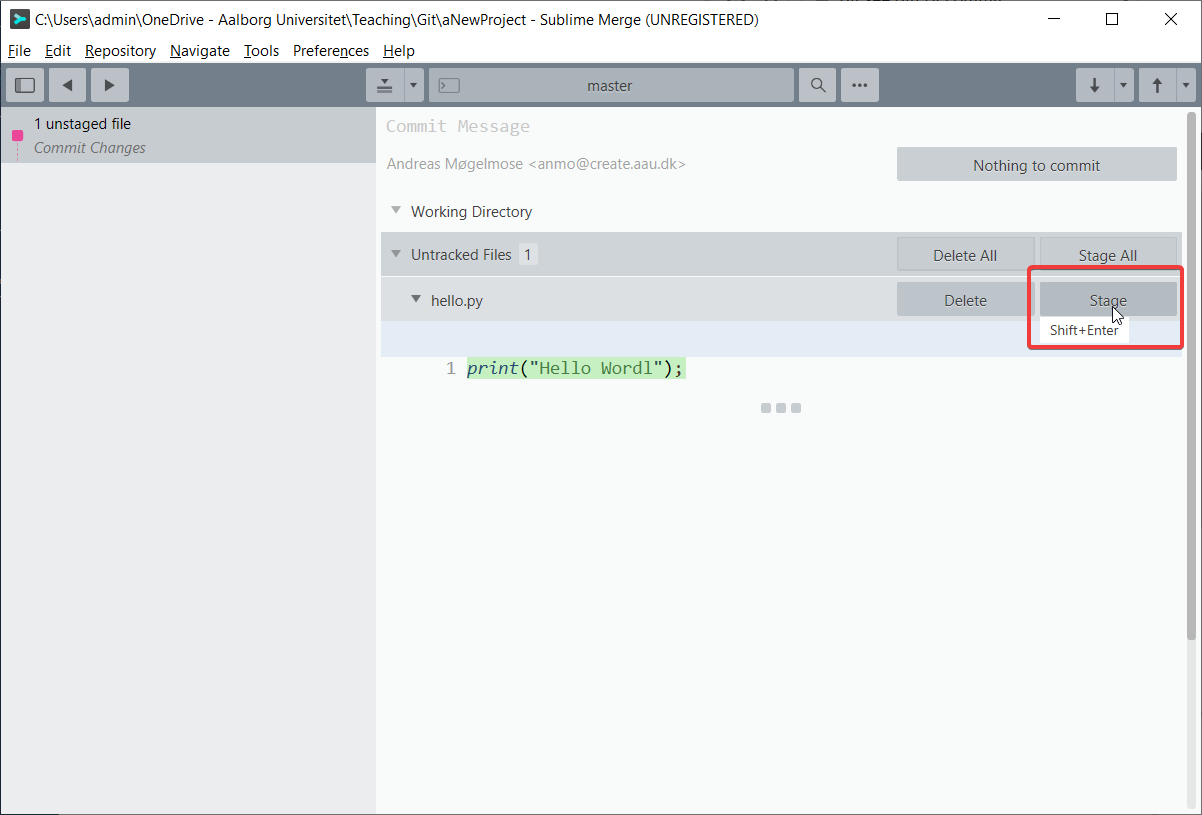

**Committing (`git commit`)**
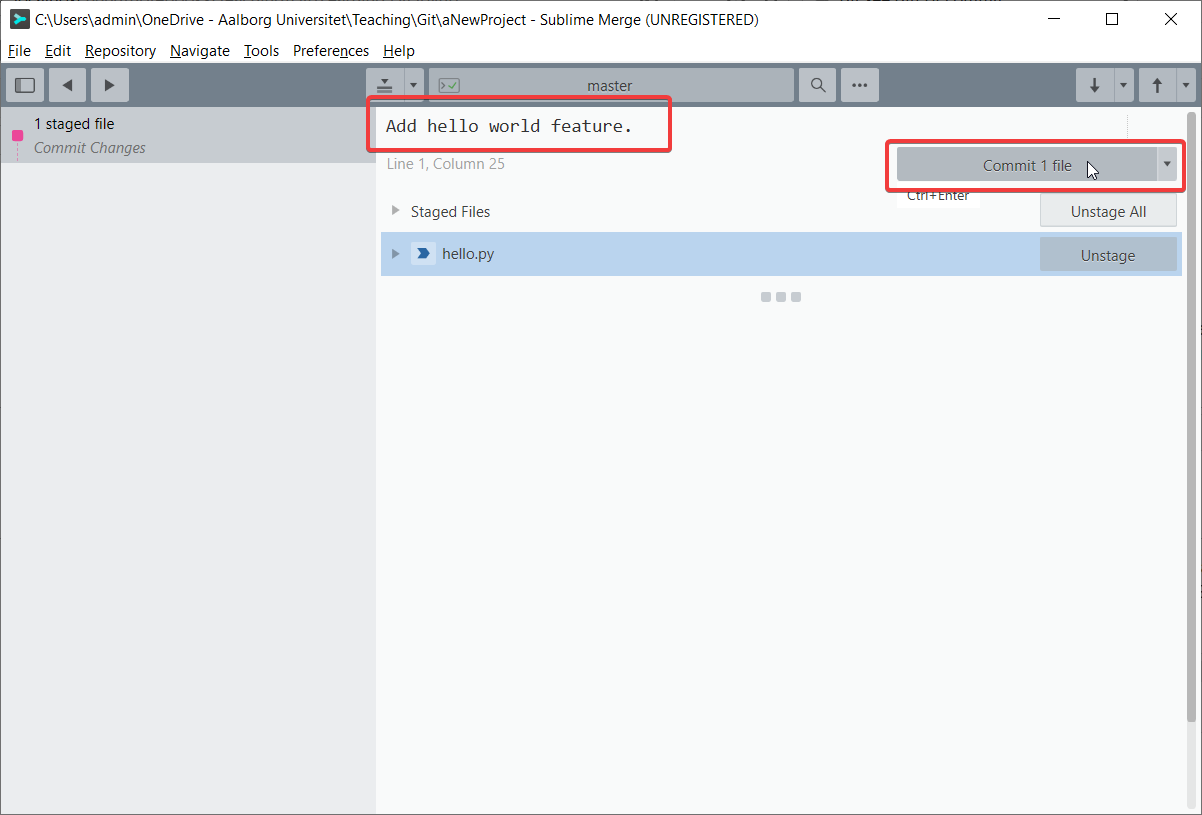

**After first commit**
Check out the left pane:
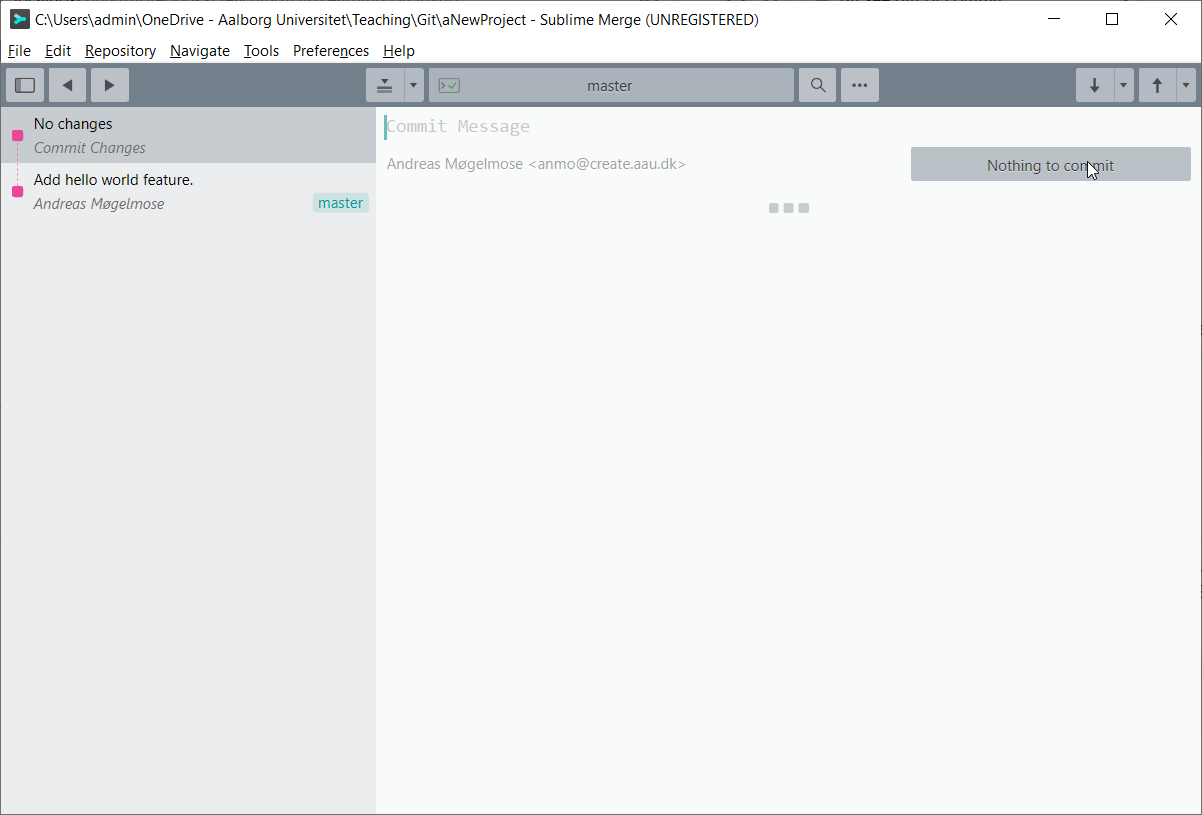

**After all commits**
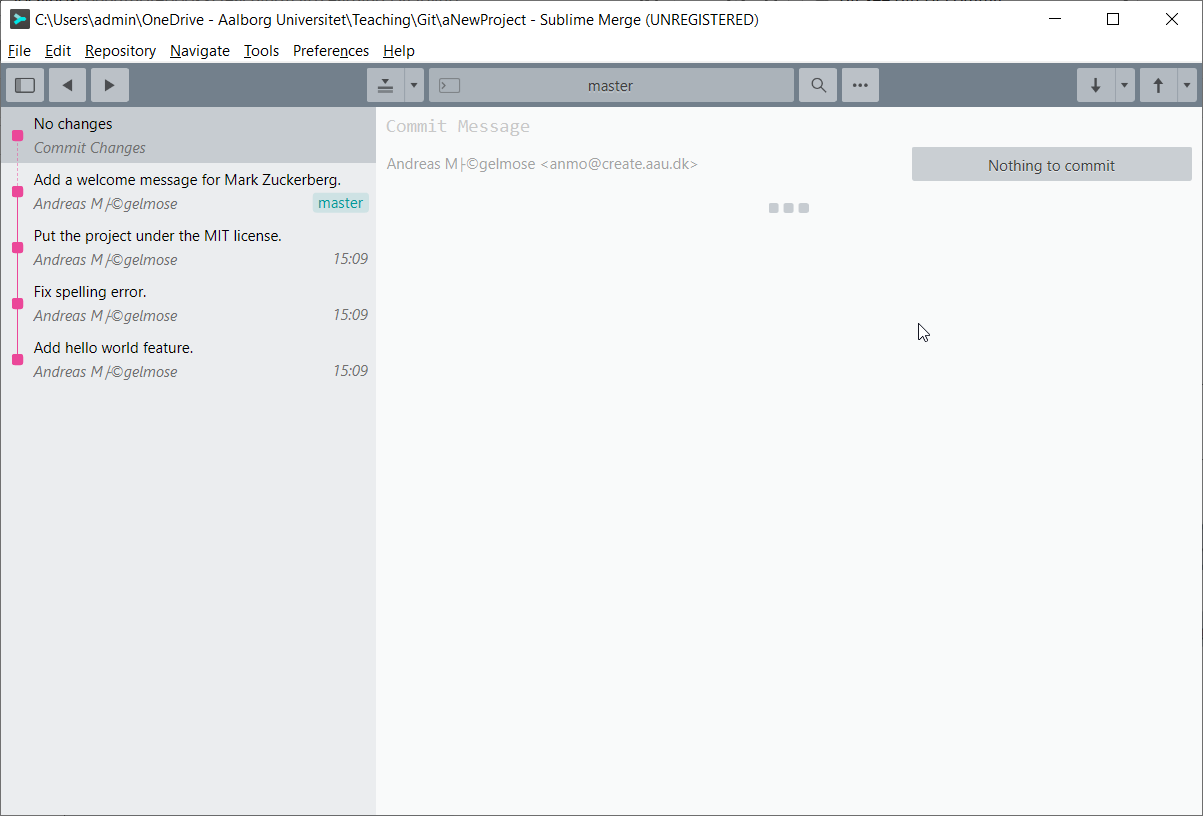

In Sublime Merge you can also easily see the changeset for each commit, simply by cliking it:
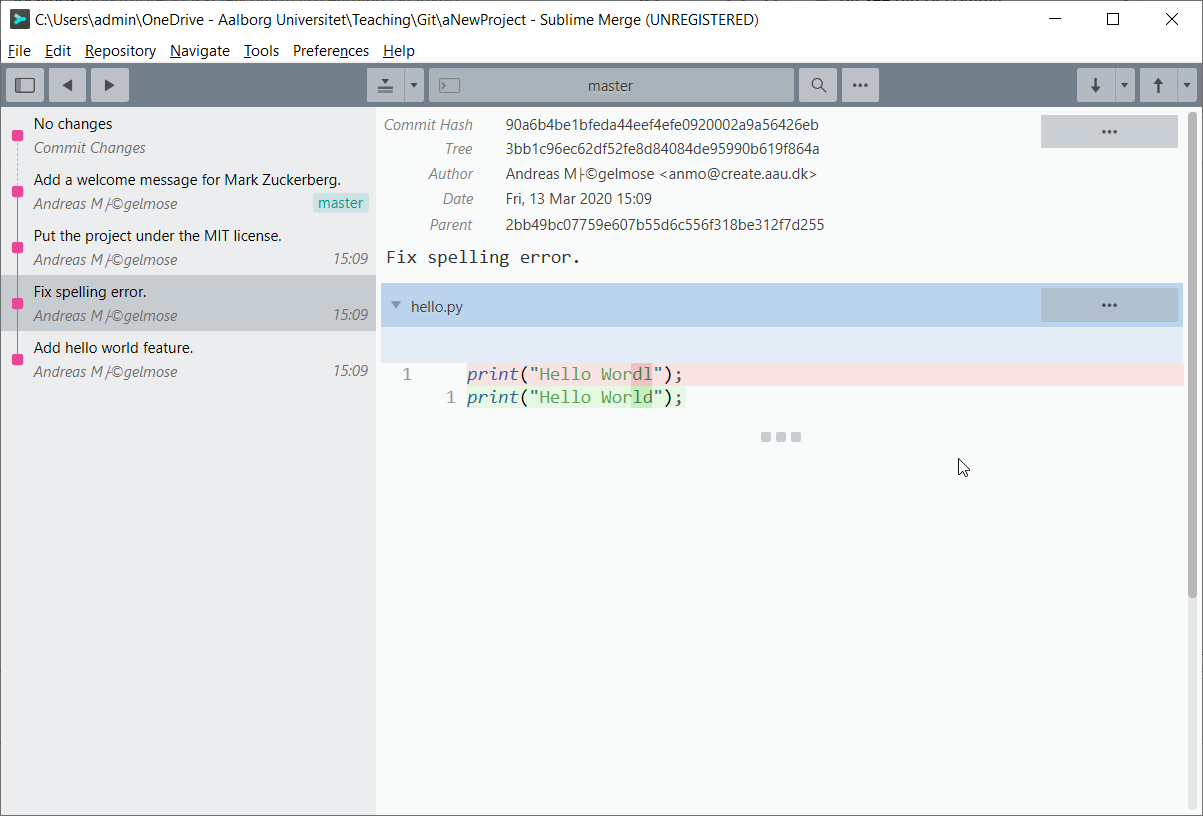

Congratulations! That was all from the first chapter. You're now a toddler in the world of Git!

Be sure to check out the [next chapter](LearningGit-Chapter2.ipynb) to learn all the stuff that makes Git great for collaboration.